In [1]:
import numpy as np
import pandas as pd
import random as random
from collections import Counter
from math import factorial
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def coin():
    toss = [] # empty list
    for i in range(11):   # 10 coins are tossed
        s = random.randint(0, 1) # 0 for tail, 1 for head
        toss.append(s)
    h=Counter(toss)
    d=dict(h)
    d1=pd.DataFrame(d.items(), columns=['Head', 'Frequency'])
    d1.sort_values("Head", axis = 0, ascending = True,inplace = True) 
    nd=d1.Frequency[1]
    return nd

In [3]:
N=100
data=[]
for i in range(N):
    dd=coin()
    data.append(dd)
cc=Counter(data)  
D=dict(cc) 
DF=pd.DataFrame(D.items(), columns=['Head', 'Frequency'])
DF

,Head,Frequency
0,7,9
1,3,13
2,4,21
3,6,18
4,5,32
5,8,5
6,2,1
7,9,1


In [4]:
DF.sort_values("Head", axis = 0, ascending = True,inplace = True) 
DF

,Head,Frequency
6,2,1
1,3,13
2,4,21
4,5,32
3,6,18
0,7,9
5,8,5
7,9,1


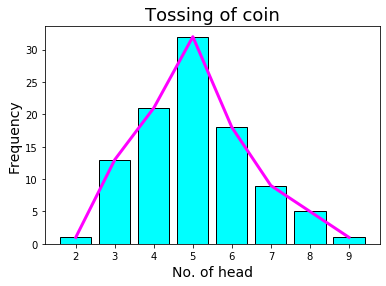

In [5]:
plt.bar(DF['Head'],DF['Frequency'],color='cyan',edgecolor='black') 
plt.plot(DF['Head'],DF['Frequency'],color='magenta',linewidth=3,) 
plt.xlabel('No. of head', fontsize=14)
plt.ylabel('Frequency',fontsize=14)  
plt.title('Tossing of coin', fontsize = 18) 
plt.show()

In [6]:
DF['Cum.Freq.'] = DF['Frequency'].cumsum()
DF

,Head,Frequency,Cum.Freq.
6,2,1,1
1,3,13,14
2,4,21,35
4,5,32,67
3,6,18,85
0,7,9,94
5,8,5,99
7,9,1,100


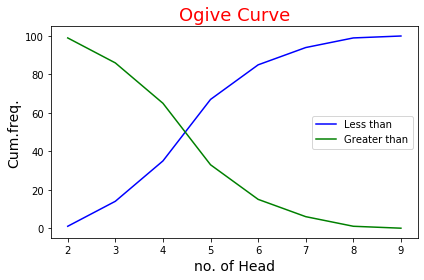

In [7]:
plt.plot(DF['Head'], DF['Cum.Freq.'], c='blue',label='Less than')
plt.plot(DF['Head'], N-DF['Cum.Freq.'], c='green',label='Greater than')
plt.xlabel('no. of Head', fontsize=14)
plt.ylabel('Cum.freq.',fontsize=14)  
plt.legend()
plt.title('Ogive Curve', fontsize = 18 ,color='red')
plt.tight_layout() 
plt.show()

In [8]:
rdata=sorted(data) #arranging data
mean=np.mean(rdata)
sd=np.sqrt(np.var(rdata))

In [9]:
print("Mean : ", mean)
print("standard deviation  : ", sd)

Mean :  5.05
standard deviation  :  1.4026760139105536


In [10]:
sk= pd.DataFrame(rdata).skew()[0]           # skewness
ku= pd.DataFrame(rdata).kurtosis()[0]      # kurtosis 

In [11]:
print("skewness : ",sk)
print("kurtosis : ",ku)

skewness :  0.3953910767397892
kurtosis :  -0.08088534328441499


In [12]:
if(sk>0):
    print('Distribution is positively tail')
elif(sk<0):
    print('Distribution is negatively tail')
elif(sk1==0):
    print('Distribution is symmetric ')    

Distribution is positively tail


In [13]:
if(ku>0):
    print('Distribution is Leptokurtic')
elif(ku<0):
    print('Distribution is Platykurtic')
elif(ku==0):
    print('Distribution is Mesokurtic')  

Distribution is Platykurtic


In [14]:
Q=np.percentile(rdata, [25, 50, 75])      # percentile
print('first quartiles is ',Q[0])
print('Median is ',Q[1])
print('third quartiles is ',Q[2])

first quartiles is  4.0
Median is  5.0
third quartiles is  6.0


Binomial distribution
\begin{equation}
prob(x)=\frac{n!}{x!(n-x)!}p^xq^{n-x}
\end{equation}

In [15]:
def binomial(x, n, p):
          
    return float(factorial(n)/(factorial(x) * factorial(n - x))) * p ** x * (1 - p)**(n - x)

In [16]:
n=max(DF['Head'])+1
ef=[] #expected frequency
for x in range(min(DF['Head']), n):
    y =binomial(x, n, 0.5)
    ef.append(round(N*y))

In [17]:
DF['Exp. Freq.'] = ef
DF

,Head,Frequency,Cum.Freq.,Exp. Freq.
6,2,1,1,4
1,3,13,14,12
2,4,21,35,21
4,5,32,67,25
3,6,18,85,21
0,7,9,94,12
5,8,5,99,4
7,9,1,100,1


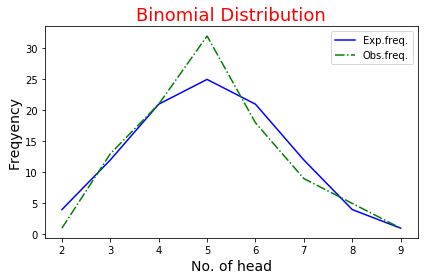

In [18]:
plt.plot(DF['Head'], ef,'b-',label='Exp.freq.')
plt.plot(DF['Head'], DF['Frequency'],'g-.', label='Obs.freq.')
plt.xlabel("No. of head", fontsize=14)
plt.ylabel("Freqyency", fontsize=14)
plt.legend()
plt.title('Binomial Distribution', fontsize = 18 ,color='red')
plt.tight_layout() 
plt.show()

In [19]:
chi2=sum((ef-DF['Frequency'])**2/ef)
print('chi square is ',chi2)                 

chi square is  5.721904761904762
